### Employee Prediction
Dataset:[Employee Dataset](https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction)

Dataset Description:

A company's HR department wants to predict whether some customers would leave the company in next 2 years. Your job is to build a predictive model that predicts the prospects of future and present employee.

|     Features     |     Data Type     |     Description     |
|------------------|-------------------|---------------------|
|     Education    |      String       |    Education Level  |
|   Joining Year   |       Int         |Year of joining year |
|      City        |      String       |City office where posted |
|    Payment Tier  |       Int         |Payment tier:1:Highest, 2:Mide Level, 3:Lowest |
|      Age         |       Int         |Current age          |
|     Gender       |      String       |Gender of employee   |
|    EverBenched   |      String       |Ever kept out of projects for 1 month or more |
|ExperienceInCurrentDomain	|   Int    |Experince in current field |
|    LeaveOrNot    |       Int         |Whether employee leaves the company in next 2 years |

Purpose:The purpose of Employee prediction is to predict employee attrition based on historical HR data. This project is to identify the main factors affecting retention and performance. The result is espected to reduce employee turnover rates. Additionally, it supports recruitment planning.

# Employee Prediction

# Preparation

## Import the Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

## Import the Dataset

In [ ]:
employee_df=pd.read_csv('./Dataset/employee-future-prediction/Employee.csv')
employee_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# EDA (Exploratory Data AnalysIs)

## Data Understanding

In [3]:
employee_df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
employee_df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
sum_duplicate=employee_df.duplicated().sum()
print("Sum Of Duplicate: ", sum_duplicate)

Sum Of Duplicate:  1889


In [7]:
row, column =employee_df.shape
print("Row of Dataframe :", row)
print("Column of Dataframe:", column)

Row of Dataframe : 4653
Column of Dataframe: 9


## Visualization

### Visualization Of Where Employees Placed

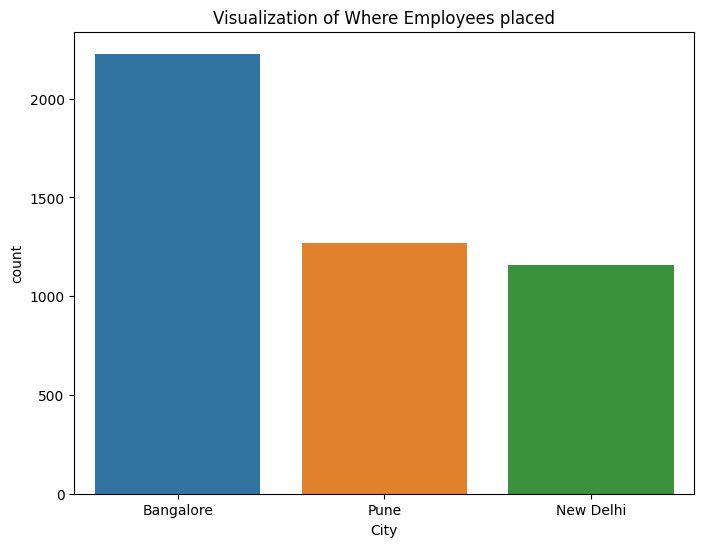

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='City')
plt.title('Visualization of Where Employees placed')
plt.show()

### Visualization Of Employee Education

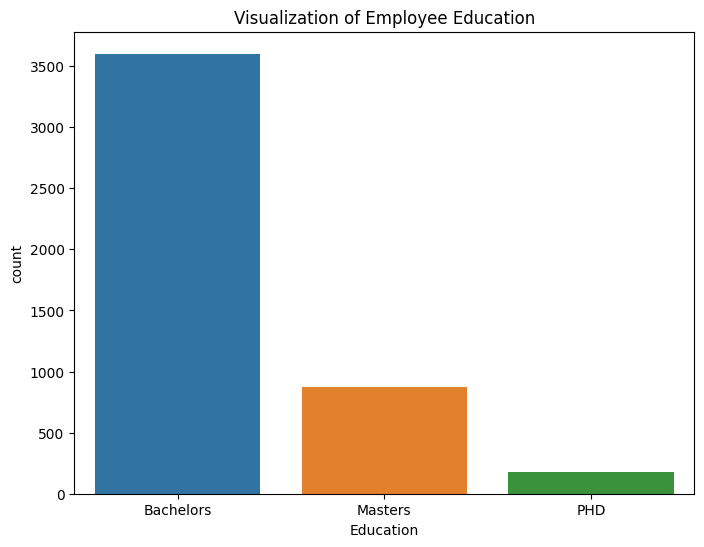

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='Education')
plt.title('Visualization of Employee Education')
plt.show()

### Visualization of Employee Join Year

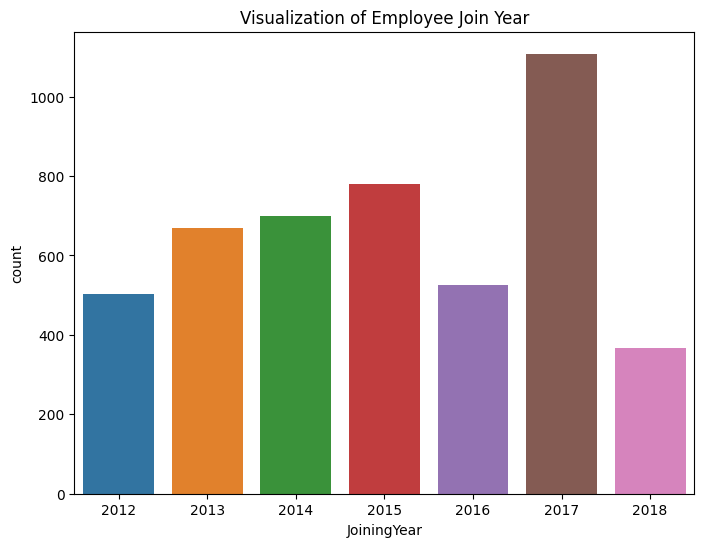

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='JoiningYear')
plt.title('Visualization of Employee Join Year')
plt.show()

### Visualization of Employee Gender

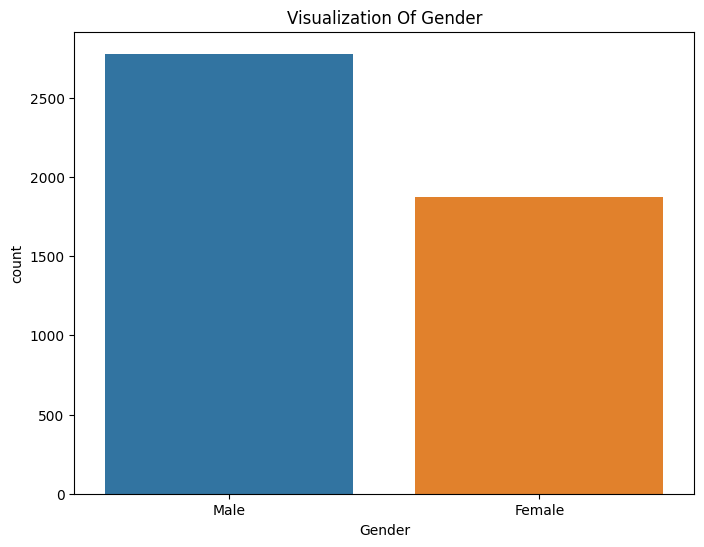

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='Gender')
plt.title('Visualization Of Gender')
plt.show()

### Visualization of Employee Condition

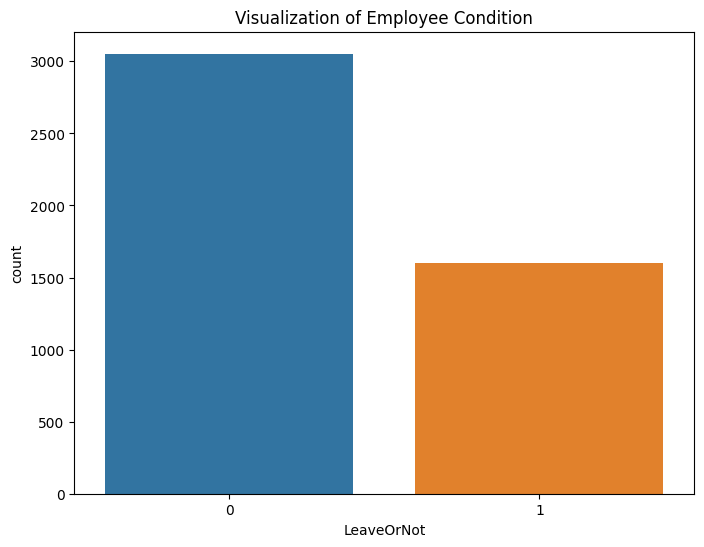

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='LeaveOrNot')
plt.title('Visualization of Employee Condition')
plt.show()

### Visualization of Employee Payment Tier

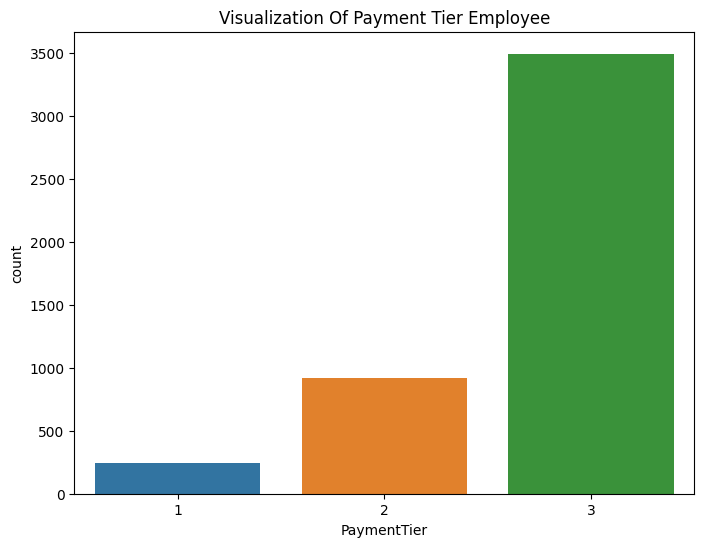

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='PaymentTier')
plt.title('Visualization Of Payment Tier Employee')
plt.show()

### Visualization of Age Group

In [14]:
def age_cat(age):
    if 22<= age <= 25:
        return 'Fresh Graduate'
    elif 26<= age <= 30:
        return 'Junior'
    elif 31<= age <=36:
        return 'Senior'
    elif 37 <=age <=41:
        return 'Manajerial'

employee_df['Age_Category']=employee_df['Age'].apply(age_cat)
        

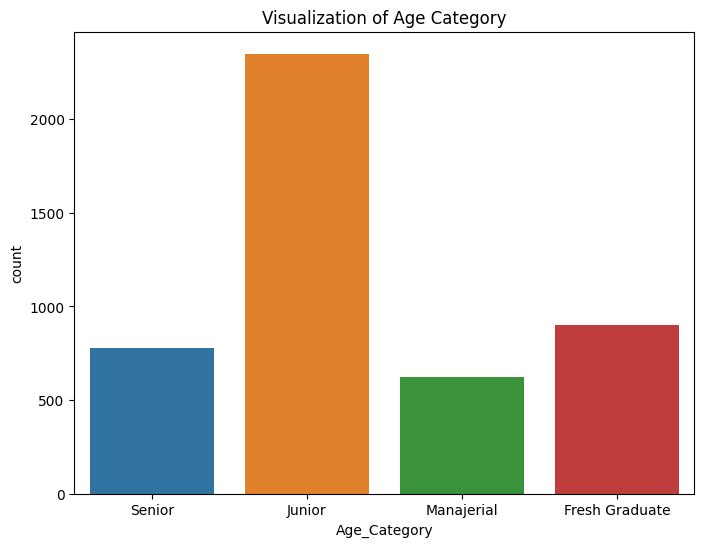

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='Age_Category')
plt.title('Visualization of Age Category')
plt.show()

### Visualization of Age Group by Employee Status (Leave Or Not)

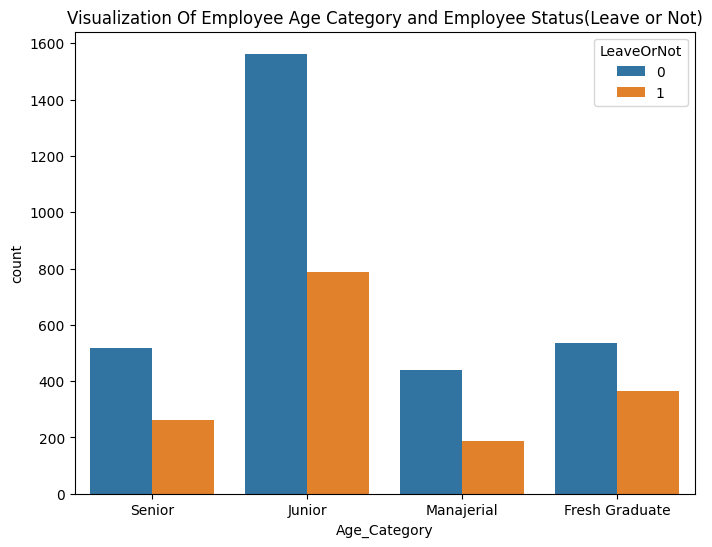

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='Age_Category', hue='LeaveOrNot')
plt.title('Visualization Of Employee Age Category and Employee Status(Leave or Not)')
plt.show()

### Visualization Of Gender and Employee Status (Leave or Not)

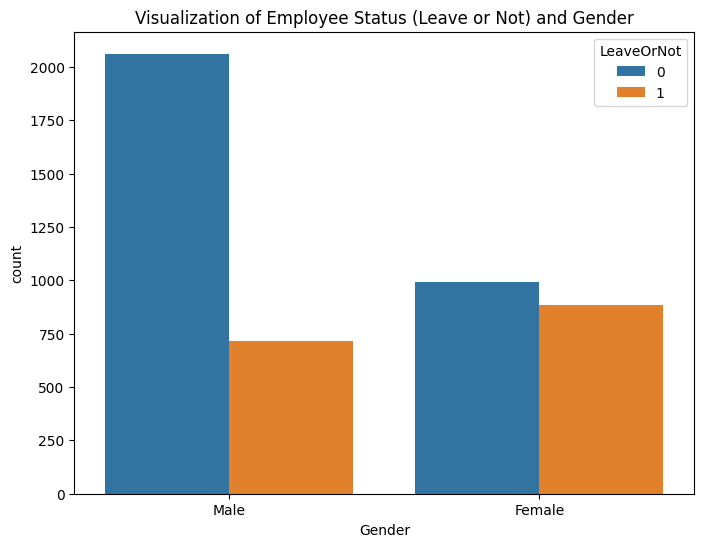

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='Gender',hue='LeaveOrNot')
plt.title('Visualization of Employee Status (Leave or Not) and Gender')
plt.show()

### Visualization of Employee Join Year and Employee Status (Leave Or Not)

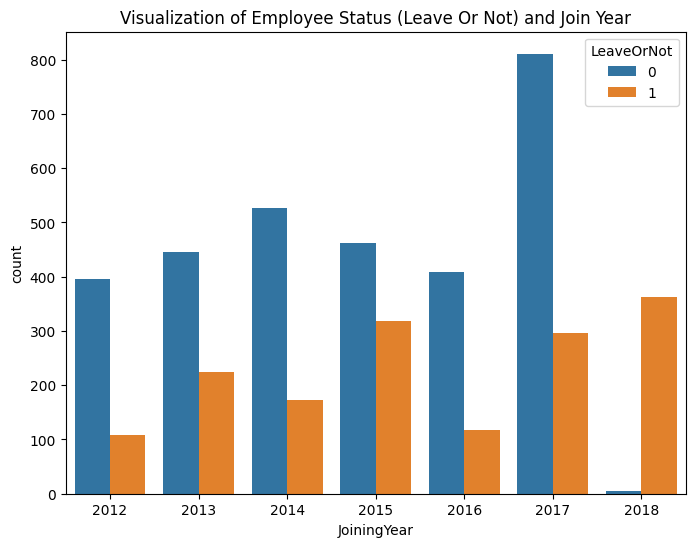

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='JoiningYear', hue='LeaveOrNot')
plt.title('Visualization of Employee Status (Leave Or Not) and Join Year')
plt.show()

### Visualization Of Payment Tier and Employee Status (Leave Or Not)

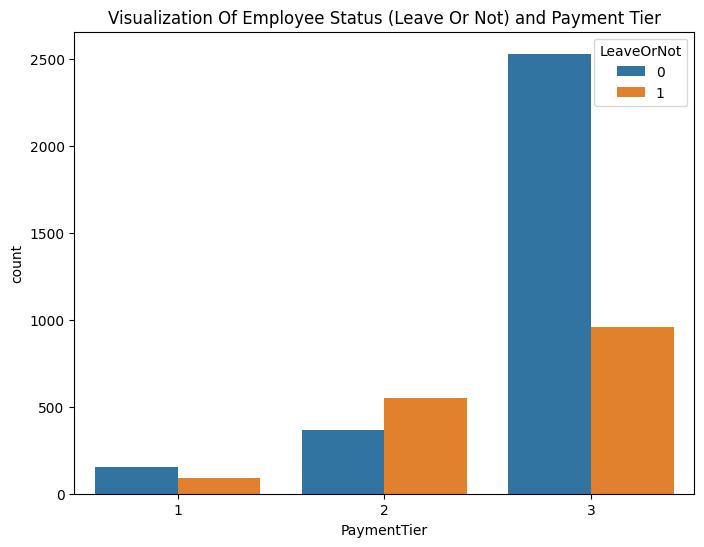

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='PaymentTier', hue='LeaveOrNot')
plt.title('Visualization Of Employee Status (Leave Or Not) and Payment Tier')
plt.show()

### Visualization of Payment Tier and Employee Education

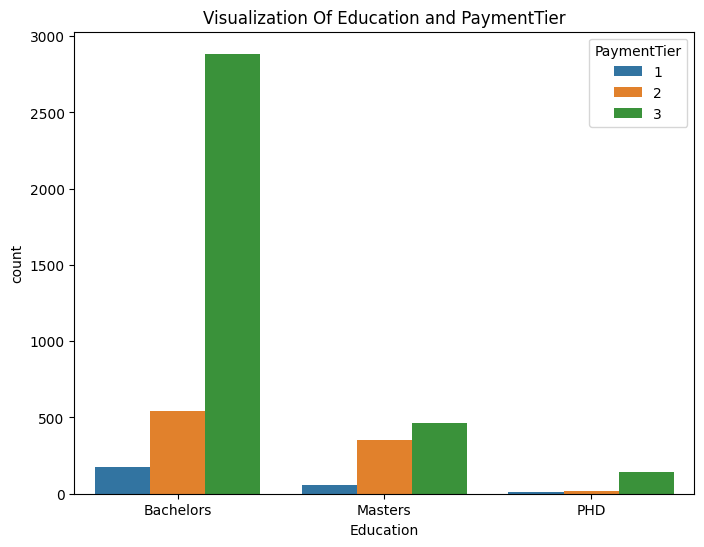

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='Education', hue='PaymentTier')
plt.title('Visualization Of Education and PaymentTier')
plt.show()

### Visualization Of Payment Tier and Gender

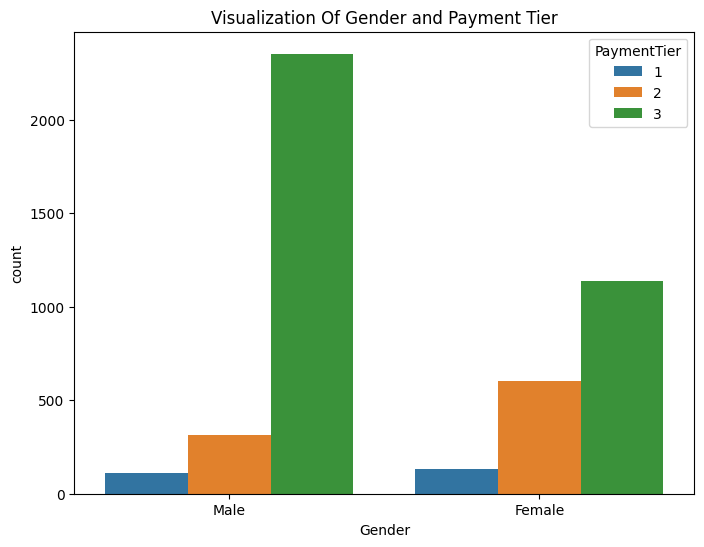

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=employee_df, x='Gender', hue='PaymentTier')
plt.title('Visualization Of Gender and Payment Tier')
plt.show()

# Preprocessing

## Drop Duplikat Data

In [22]:
employee_df=employee_df.drop_duplicates()
employee_df.shape

(2764, 10)

## Encoding

In [23]:
education={
    'Bachelors':0,
    'Masters':1,
    'PHD':2,
}
gender={
    'Male':1,
    'Female':2,
}
city={
    'Bangalore':0,
    'Pune':1,
    'New Delhi':2,
}
evb={
    'Yes':1,
    'No':0,
}
employee_df['Education']=employee_df['Education'].map(education)
employee_df['Gender']=employee_df['Gender'].map(gender)
employee_df['City']=employee_df['City'].map(city)
employee_df['EverBenched']=employee_df['EverBenched'].map(evb)

### Train and Test Split

In [24]:
X=employee_df.drop(columns=['LeaveOrNot','Age_Category'])
y=employee_df['LeaveOrNot']

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Train Shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test Shape : X_test {X_test.shape}, y_test {y_test.shape}")


Train Shape: X_train (2211, 8), y_train (2211,)
Test Shape : X_test (553, 8), y_test (553,)


## Oversample

In [26]:
train_df=X_train.copy()
train_df['LeaveOrNot']=y_train

employee_majority=train_df[train_df['LeaveOrNot']==0]
employee_minority=train_df[train_df['LeaveOrNot']==1]

employee_minority_oversample=resample(
    employee_minority,
    replace=True,
    n_samples=len(employee_majority),
    random_state=42
)

train_balanced=pd.concat([employee_majority, employee_minority_oversample])
train_balanced=train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X_train=train_balanced.drop(columns='LeaveOrNot', axis=1)
y_train=train_balanced['LeaveOrNot']
y_train.value_counts()

LeaveOrNot
0    1343
1    1343
Name: count, dtype: int64

# Modelling

## Logistic Regression

### Score Metric

In [27]:
Lg=LogisticRegression(max_iter=1000).fit(X_train,y_train)
eval_lg_train=Lg.predict(X_train)
eval_lg_test=Lg.predict(X_test)

accuracy_lg=accuracy_score(y_test, eval_lg_test)
precision_lg=precision_score(y_test, eval_lg_test)
recall_lg=recall_score(y_test, eval_lg_test)
f1_lg= f1_score(y_test, eval_lg_test)

In [28]:
result=({
    "Accuracy":[accuracy_lg],
    "Precision":[precision_lg],
    "Recall":[recall_lg],
    "F1 Score":[f1_lg],
})

result=pd.DataFrame(result, index=['Logistic Regression'])
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043


### Classification Report

In [29]:
print('Training Data')
print(classification_report(y_train, eval_lg_train))

print('='*50)

print('Test Data')
print(classification_report(y_test, eval_lg_test))

Training Data
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1343
           1       0.61      0.59      0.60      1343

    accuracy                           0.60      2686
   macro avg       0.60      0.60      0.60      2686
weighted avg       0.60      0.60      0.60      2686

Test Data
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       333
           1       0.54      0.60      0.57       220

    accuracy                           0.64       553
   macro avg       0.63      0.63      0.63       553
weighted avg       0.65      0.64      0.64       553



### Confusion Matrix

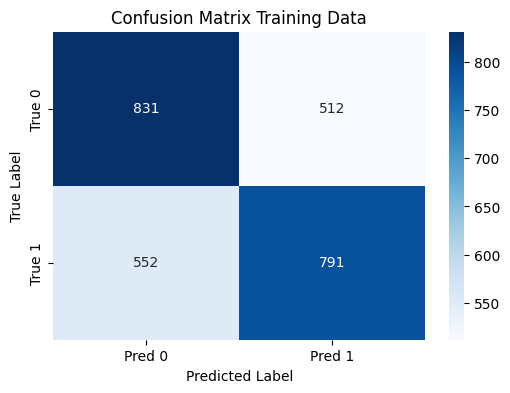

In [30]:
cm_train_lg=confusion_matrix(y_train, eval_lg_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

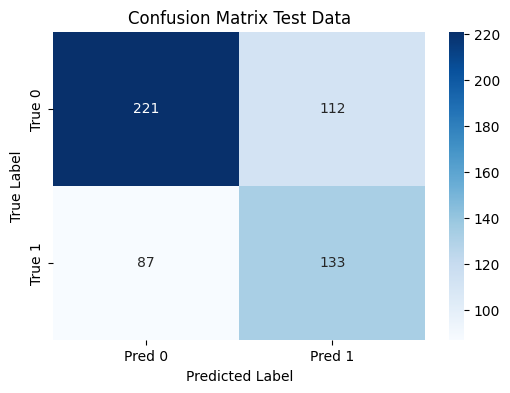

In [31]:
cm_test_lg=confusion_matrix(y_test, eval_lg_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Random Forest Classifier

### Score Metric

In [32]:
Rf=RandomForestClassifier().fit(X_train, y_train)
eval_Rf_train=Rf.predict(X_train)
eval_Rf_test=Rf.predict(X_test)

accuracy_rf=accuracy_score(y_test, eval_Rf_test)
precision_rf=precision_score(y_test, eval_Rf_test)
recall_rf=recall_score(y_test, eval_Rf_test)
f1_rf=f1_score(y_test, eval_Rf_test)

In [33]:
result.loc['Random Forest']=[accuracy_rf,precision_rf,recall_rf, f1_rf]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404


### Classification Report

In [34]:
print('Training Data')
print(classification_report(y_train, eval_Rf_train))

print('='*50)

print('Test Data')
print(classification_report(y_test, eval_Rf_test))

Training Data
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1343
           1       0.94      0.98      0.96      1343

    accuracy                           0.95      2686
   macro avg       0.96      0.95      0.95      2686
weighted avg       0.96      0.95      0.95      2686

Test Data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       333
           1       0.71      0.58      0.64       220

    accuracy                           0.74       553
   macro avg       0.73      0.71      0.72       553
weighted avg       0.73      0.74      0.73       553



### Confusion Matrix

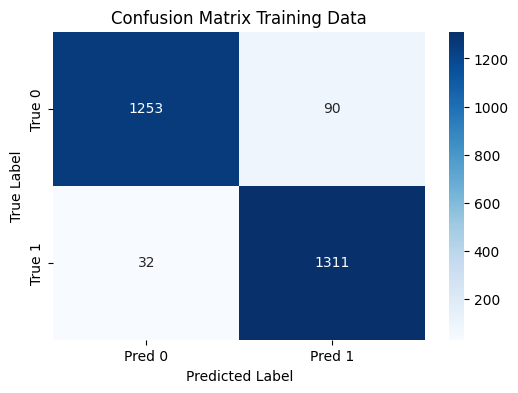

In [35]:
cm_train_rf=confusion_matrix(y_train, eval_Rf_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

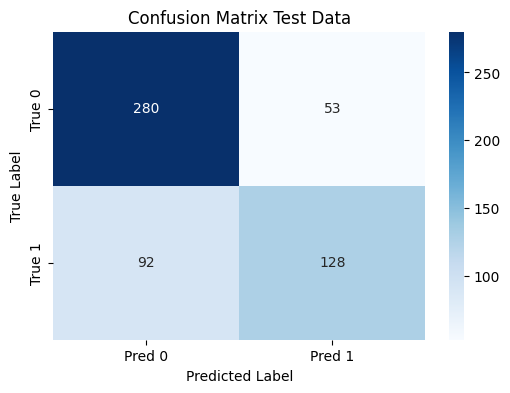

In [36]:
cm_test_rf=confusion_matrix(y_test, eval_Rf_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'],yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Decision Tree Classifier

### Score Metric

In [37]:
Dt=DecisionTreeClassifier().fit(X_train, y_train)

eval_dt_train=Dt.predict(X_train)
eval_dt_test=Dt.predict(X_test)

accuracy_dt=accuracy_score(y_test, eval_dt_test)
precision_dt=precision_score(y_test, eval_dt_test)
recall_dt=recall_score(y_test, eval_dt_test)
f1_dt=f1_score(y_test, eval_dt_test)

In [38]:
result.loc['Decision Tree']=[accuracy_dt,precision_dt, recall_dt, f1_dt]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404
Decision Tree,0.676311,0.594470,0.586364,0.590389


### Classification Report

In [39]:
print('Training Data')
print(classification_report(y_train, eval_dt_train))

print('='*50)

print('Test Data')
print(classification_report(y_test, eval_dt_test))

Training Data
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1343
           1       0.95      0.96      0.96      1343

    accuracy                           0.96      2686
   macro avg       0.96      0.96      0.96      2686
weighted avg       0.96      0.96      0.96      2686

Test Data
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       333
           1       0.59      0.59      0.59       220

    accuracy                           0.68       553
   macro avg       0.66      0.66      0.66       553
weighted avg       0.68      0.68      0.68       553



### Confusion Matrix

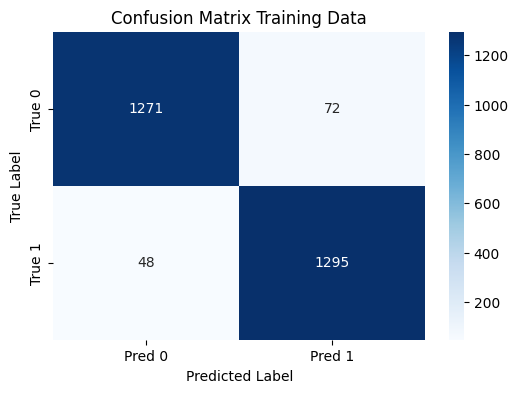

In [40]:
cm_train_dt=confusion_matrix(y_train, eval_dt_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

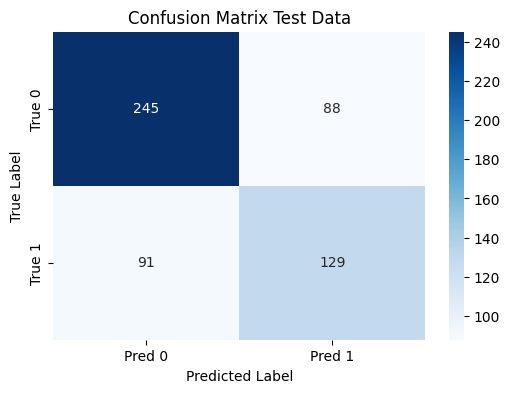

In [41]:
cm_test_dt=confusion_matrix(y_test, eval_dt_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'],yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## SVM

### Score Metric

In [42]:
svm=SVC().fit(X_train, y_train)

eval_svm_train=svm.predict(X_train)
eval_svm_test=svm.predict(X_test)

accuracy_svm=accuracy_score(y_test, eval_svm_test)
precision_svm=precision_score(y_test, eval_svm_test)
recall_svm=recall_score(y_test, eval_svm_test)
f1_svm=f1_score(y_test, eval_svm_test)

In [43]:
result.loc['SVM']=[accuracy_svm,precision_svm, recall_svm, f1_svm]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404
Decision Tree,0.676311,0.594470,0.586364,0.590389
SVM,0.524412,0.439437,0.709091,0.542609


### Classification Report

In [44]:
print('Training Data')
print(classification_report(y_train, eval_svm_train))

print('='*50)
print('Test Data')
print(classification_report(y_test, eval_svm_test))

Training Data
              precision    recall  f1-score   support

           0       0.57      0.45      0.50      1343
           1       0.55      0.66      0.60      1343

    accuracy                           0.56      2686
   macro avg       0.56      0.56      0.55      2686
weighted avg       0.56      0.56      0.55      2686

Test Data
              precision    recall  f1-score   support

           0       0.68      0.40      0.50       333
           1       0.44      0.71      0.54       220

    accuracy                           0.52       553
   macro avg       0.56      0.56      0.52       553
weighted avg       0.58      0.52      0.52       553



### Confusion Matrix

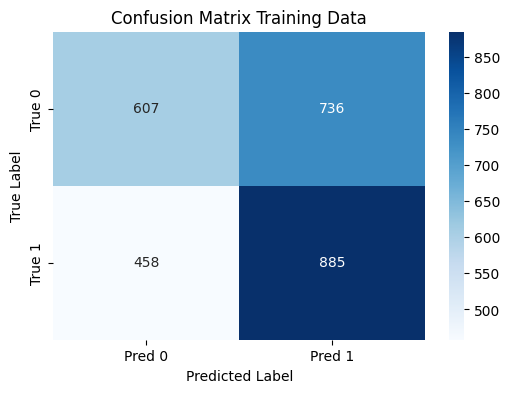

In [45]:
cm_train_svm=confusion_matrix(y_train, eval_svm_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

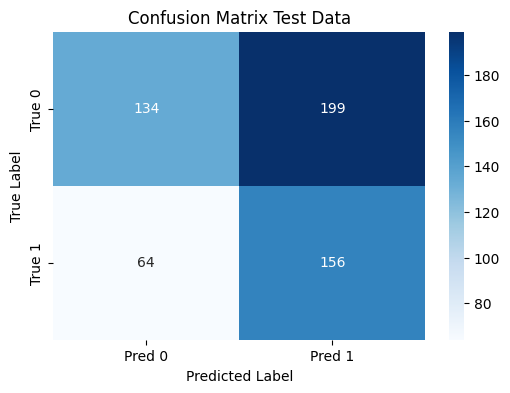

In [46]:
cm_test_svm=confusion_matrix(y_test, eval_svm_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

# Feature Selection

## Feature Selection using RFE

In [47]:
model=LinearRegression()
rfe_selector=RFE(model, n_features_to_select=5)
X_train_rfe=rfe_selector.fit_transform(X_train, y_train)
X_test_rfe=rfe_selector.transform(X_test)
print("Choosen Feature:", rfe_selector.get_support(indices=True))
selected_features=X.columns[rfe_selector.get_support(indices=True)]
print("Choosen Feature`s Name:",selected_features.tolist())


Choosen Feature: [1 2 3 5 6]
Choosen Feature`s Name: ['JoiningYear', 'City', 'PaymentTier', 'Gender', 'EverBenched']


## Training Data and Test Data Split

In [48]:
X_selected=employee_df[['JoiningYear', 'City', 'PaymentTier', 'Gender', 'EverBenched']]
X_train1, X_test1, y_train1, y_test1=train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [49]:
y_train1.value_counts()

LeaveOrNot
0    1343
1     868
Name: count, dtype: int64

### Oversample

In [50]:
train_df1=X_train1.copy()
train_df1['LeaveOrNot']=y_train1

employee_majority=train_df1[train_df1['LeaveOrNot']==0]
employee_minority=train_df1[train_df1['LeaveOrNot']==1]

employee_oversample_minority=resample(
    employee_minority,
    replace=True,
    n_samples=len(employee_majority),
    random_state=42
)

train_balanced=pd.concat([employee_majority, employee_oversample_minority])
train_balanced=train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X_train1=train_balanced.drop(columns='LeaveOrNot', axis=1)
y_train1=train_balanced['LeaveOrNot']
y_train1.value_counts()

LeaveOrNot
0    1343
1    1343
Name: count, dtype: int64

## Logistic Regression (After Feature Selection)

### Score Metric

In [51]:
Lg1=LogisticRegression().fit(X_train1, y_train1)
eval_lg1_train=Lg1.predict(X_train1)
eval_lg1_test=Lg1.predict(X_test1)

accuracy_lg1=accuracy_score(y_test1, eval_lg1_test)
precision_lg1=precision_score(y_test1, eval_lg1_test)
recall_lg1=recall_score(y_test1, eval_lg1_test)
f1_lg1=f1_score(y_test1, eval_lg1_test)


In [52]:
result.loc['Logistic Regression (After Feature Selection)']=[accuracy_lg1, precision_lg1, recall_lg1, f1_lg1]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404
Decision Tree,0.676311,0.594470,0.586364,0.590389
SVM,0.524412,0.439437,0.709091,0.542609
Logistic Regression (After Feature Selection),0.591320,0.489051,0.609091,0.542510


### Classification Report

In [53]:
print('Training Data')
print(classification_report(y_train1, eval_lg1_train))

print('='*50)

print('Test Data')
print(classification_report(y_test1, eval_lg1_test))

Training Data
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      1343
           1       0.58      0.58      0.58      1343

    accuracy                           0.58      2686
   macro avg       0.58      0.58      0.58      2686
weighted avg       0.58      0.58      0.58      2686

Test Data
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       333
           1       0.49      0.61      0.54       220

    accuracy                           0.59       553
   macro avg       0.59      0.59      0.59       553
weighted avg       0.61      0.59      0.60       553



### Confusion Matrix

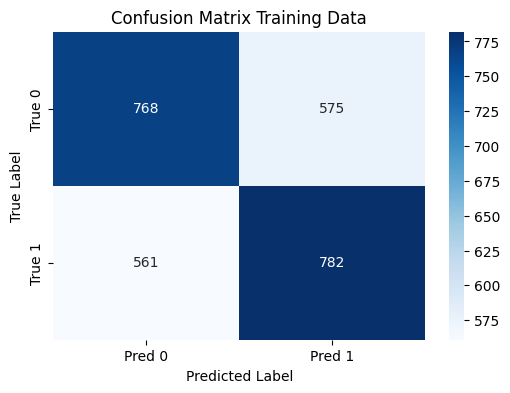

In [54]:
cm_lg1_train=confusion_matrix(y_train1, eval_lg1_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lg1_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

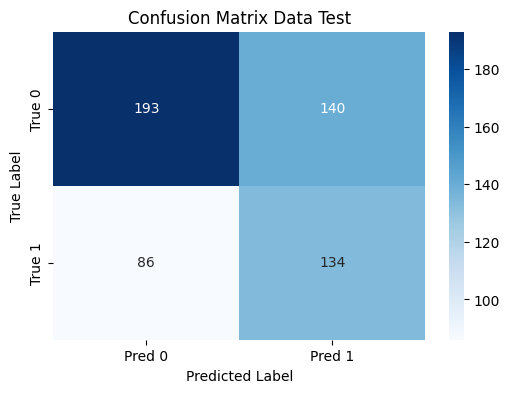

In [55]:
cm_test_lg1=confusion_matrix(y_test1, eval_lg1_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_lg1, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Data Test')
plt.show()

## Random Forest (After Feature Selection)

### Score Metric

In [56]:
Rf1=RandomForestClassifier().fit(X_train1, y_train1)
eval_rf1_train=Rf1.predict(X_train1)
eval_rf1_test=Rf1.predict(X_test1)

accuracy_rf1=accuracy_score(y_test1, eval_rf1_test)
precision_rf1=precision_score(y_test1, eval_rf1_test)
recall_rf1=recall_score(y_test1, eval_rf1_test)
f1_rf1=f1_score(y_test1, eval_rf1_test)

In [57]:
result.loc['Random Forest (After Feature Selection)']=[accuracy_rf1, precision_rf1, recall_rf1, f1_rf1]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404
Decision Tree,0.676311,0.594470,0.586364,0.590389
SVM,0.524412,0.439437,0.709091,0.542609
Logistic Regression (After Feature Selection),0.591320,0.489051,0.609091,0.542510
Random Forest (After Feature Selection),0.755877,0.763975,0.559091,0.645669


### Classification Report

In [58]:
print('Training Data')
print(classification_report(y_train1, eval_rf1_train))

print('='*50)

print('Test Data')
print(classification_report(y_test1, eval_rf1_test))

Training Data
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      1343
           1       0.86      0.60      0.71      1343

    accuracy                           0.75      2686
   macro avg       0.78      0.75      0.75      2686
weighted avg       0.78      0.75      0.75      2686

Test Data
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       333
           1       0.76      0.56      0.65       220

    accuracy                           0.76       553
   macro avg       0.76      0.72      0.73       553
weighted avg       0.76      0.76      0.75       553



### Confusion Matrix

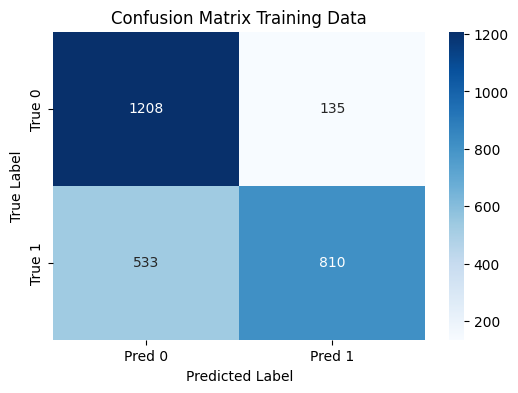

In [59]:
cm_train_rf1=confusion_matrix(y_train1, eval_rf1_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_rf1, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

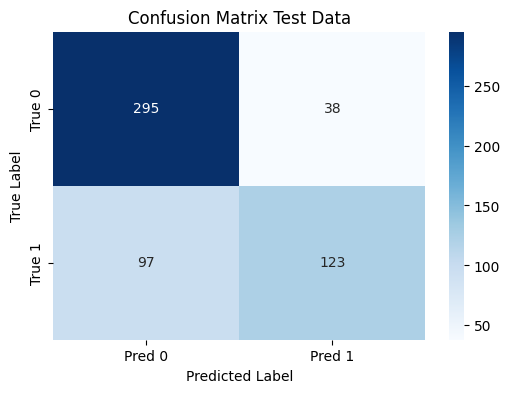

In [60]:
cm_test_rf1=confusion_matrix(y_test1, eval_rf1_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_rf1, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Decision Tree (After Feature Selection)

### Score Metric

In [61]:
Dt1=DecisionTreeClassifier().fit(X_train1, y_train1)
eval_dt1_train=Dt1.predict(X_train1)
eval_dt1_test=Dt1.predict(X_test1)

accuracy_dt1=accuracy_score(y_test1, eval_dt1_test)
precision_dt1=precision_score(y_test1, eval_dt1_test)
recall_dt1=recall_score(y_test1, eval_dt1_test)
f1_dt1=f1_score(y_test1, eval_dt1_test)

In [62]:
result.loc['Decision Tree (After Feature Selection)']=[accuracy_dt1, precision_dt1, recall_dt1, f1_dt1]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404
Decision Tree,0.676311,0.594470,0.586364,0.590389
SVM,0.524412,0.439437,0.709091,0.542609
Logistic Regression (After Feature Selection),0.591320,0.489051,0.609091,0.542510
Random Forest (After Feature Selection),0.755877,0.763975,0.559091,0.645669
Decision Tree (After Feature Selection),0.764919,0.792208,0.554545,0.652406


### Classification Report

In [63]:
print('Training Data')
print(classification_report(y_train1, eval_dt1_train))

print('='*50)
print('Test Data')
print(classification_report(y_test1, eval_dt1_test))

Training Data
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      1343
           1       0.88      0.58      0.70      1343

    accuracy                           0.75      2686
   macro avg       0.78      0.75      0.74      2686
weighted avg       0.78      0.75      0.74      2686

Test Data
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       333
           1       0.79      0.55      0.65       220

    accuracy                           0.76       553
   macro avg       0.77      0.73      0.74       553
weighted avg       0.77      0.76      0.75       553



### Confusion Matrix

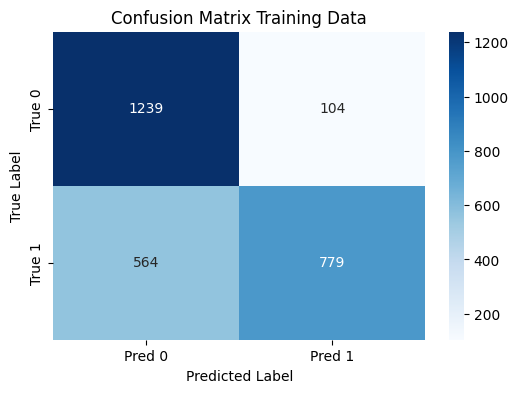

In [64]:
cm_dt1_train=confusion_matrix(y_train1, eval_dt1_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt1_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

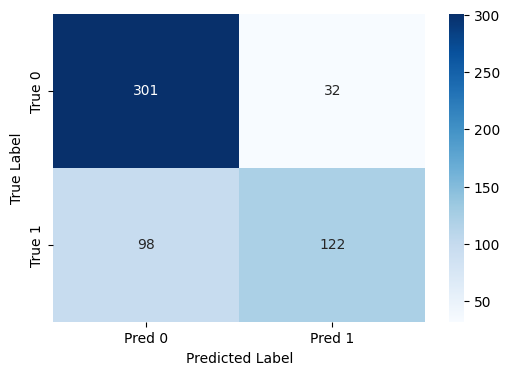

In [65]:
cm_dt1_test=confusion_matrix(y_test1, eval_dt1_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt1_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show('Confusion Matrix Test Data')

## SVM (After Feature Selection)

### Score Metric

In [66]:
svm1=SVC().fit(X_train1, y_train1)
eval_svm1_train=svm1.predict(X_train1)
eval_svm1_test=svm1.predict(X_test1)

accuracy_svm1=accuracy_score(y_test1, eval_svm1_test)
precision_svm1= precision_score(y_test1, eval_svm1_test)
recall_svm1=recall_score(y_test1, eval_svm1_test)
f1_svm1=f1_score(y_test1, eval_svm1_test)

In [67]:
result.loc['SVM (After Feature Selection)']=[accuracy_svm1, precision_svm1, recall_svm1, f1_svm1]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404
Decision Tree,0.676311,0.594470,0.586364,0.590389
SVM,0.524412,0.439437,0.709091,0.542609
Logistic Regression (After Feature Selection),0.591320,0.489051,0.609091,0.542510
Random Forest (After Feature Selection),0.755877,0.763975,0.559091,0.645669
Decision Tree (After Feature Selection),0.764919,0.792208,0.554545,0.652406
SVM (After Feature Selection),0.589512,0.487179,0.604545,0.539554


### Classification Report

In [68]:
print('Training Data')
print(classification_report(y_train1, eval_svm1_train))

print('='*50)
print('Test Data')
print(classification_report(y_test1, eval_svm1_test))

Training Data
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1343
           1       0.55      0.55      0.55      1343

    accuracy                           0.55      2686
   macro avg       0.55      0.55      0.55      2686
weighted avg       0.55      0.55      0.55      2686

Test Data
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       333
           1       0.49      0.60      0.54       220

    accuracy                           0.59       553
   macro avg       0.59      0.59      0.58       553
weighted avg       0.61      0.59      0.59       553



### Confusion Matrix

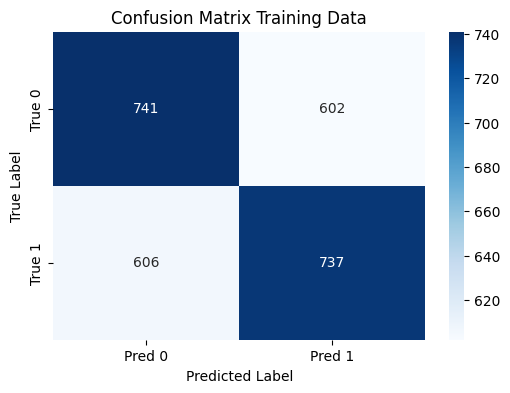

In [69]:
cm_svm1_train=confusion_matrix(y_train1, eval_svm1_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm1_train, fmt='d', annot=True, cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix Test Data')

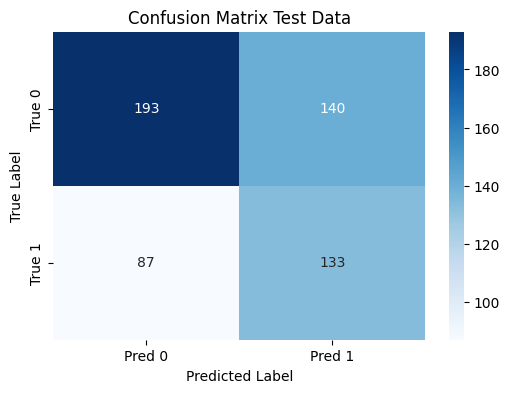

In [70]:
cm_svm1_test=confusion_matrix(y_test1, eval_svm1_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm1_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')

# Hypertune Parameter

## Random Forest Hypertune Parameter 

In [71]:
rf_param={
    'n_estimators':[50,100,150,200],
    'max_depth':[3,5,7,10],
    'min_samples_leaf':[2,4,6,8],
    'min_samples_split':[3,5,7,10],
    'criterion':['gini','entropy']
}

rf_grid=GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param,
    cv=3,
    scoring='roc_auc'
)

rf_grid.fit(X_train1, y_train1)
print("Random Forest Best Params", rf_grid.best_params_)


Random Forest Best Params {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


## Decision Tree Hypertune Parameter

In [72]:
dt_params={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,10],
    'min_samples_leaf':[3,5,10],
    'min_samples_split':[2,5,7]
}

dt_grid=GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=dt_params,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)
dt_grid.fit(X_train1, y_train1)
print("Decision Tree Best Params:", dt_grid.best_params_)


Decision Tree Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7}


## Random Forest (After Hypertune Parameter)

### Score Metric

In [73]:
Rf2=RandomForestClassifier(criterion= 'entropy',max_depth=7, min_samples_leaf= 2, n_estimators= 150,min_samples_split= 5).fit(X_train1, y_train1)
eval_RF2_train=Rf2.predict(X_train1)
eval_RF2_test=Rf2.predict(X_test1)

accuracy_rf2=accuracy_score(y_test1, eval_RF2_test)
precision_rf2=precision_score(y_test1, eval_RF2_test)
recall_rf2=recall_score(y_test1, eval_RF2_test)
f1_rf2=f1_score(y_test1, eval_RF2_test)


In [74]:
result.loc['Random Forest (After Hypertune Parameter)']=[accuracy_rf2, precision_rf2, recall_rf2, f1_rf2]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404
Decision Tree,0.676311,0.594470,0.586364,0.590389
SVM,0.524412,0.439437,0.709091,0.542609
Logistic Regression (After Feature Selection),0.591320,0.489051,0.609091,0.542510
Random Forest (After Feature Selection),0.755877,0.763975,0.559091,0.645669
Decision Tree (After Feature Selection),0.764919,0.792208,0.554545,0.652406
SVM (After Feature Selection),0.589512,0.487179,0.604545,0.539554
Random Forest (After Hypertune Parameter),0.772152,0.797468,0.572727,0.666667


### Classification Report

In [75]:
print('Training Data')
print(classification_report(y_train1, eval_RF2_train))

print('='*50)
print('Test Data')
print(classification_report(y_test1, eval_RF2_test))

Training Data
              precision    recall  f1-score   support

           0       0.68      0.92      0.78      1343
           1       0.88      0.58      0.70      1343

    accuracy                           0.75      2686
   macro avg       0.78      0.75      0.74      2686
weighted avg       0.78      0.75      0.74      2686

Test Data
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       333
           1       0.80      0.57      0.67       220

    accuracy                           0.77       553
   macro avg       0.78      0.74      0.75       553
weighted avg       0.78      0.77      0.76       553



### Confusion Matrix

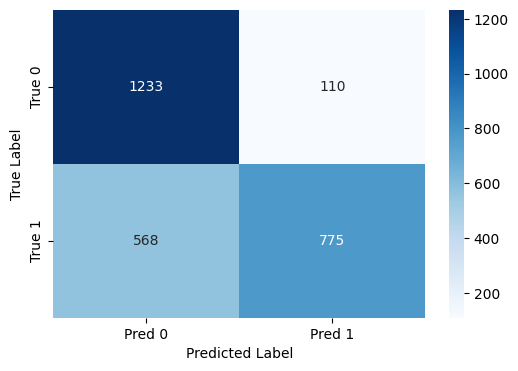

In [76]:
cm_train_rf2=confusion_matrix(y_train1, eval_RF2_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_rf2, annot=True, fmt='d',cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show('Confusion Matrix Training Data')
plt.show()

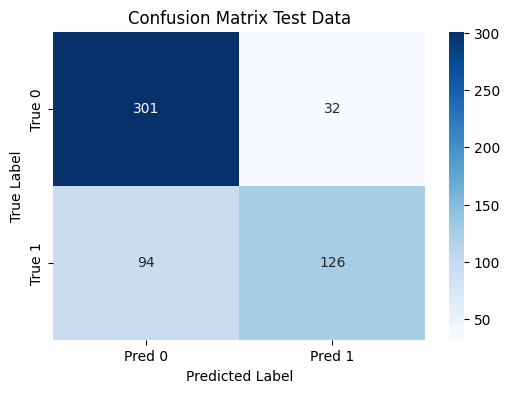

In [77]:
cm_test_rf2=confusion_matrix(y_test1, eval_RF2_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_rf2, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Decision Tree (After Hypertune Parameter)

### Score Metric

In [78]:
DT2=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 3, min_samples_split= 7).fit(X_train1, y_train1)
eval_dt2_train=DT2.predict(X_train1)
eval_dt2_test=DT2.predict(X_test1)

accuracy_dt2=accuracy_score(y_test1, eval_dt2_test)
precision_dt2=precision_score(y_test1 ,eval_dt2_test)
recall_dt2=recall_score(y_test1, eval_dt2_test)
f1_dt2=f1_score(eval_dt2_test, y_test1)

In [79]:
result.loc['Decision Tree (After Hypertune Parameter)']=[accuracy_dt2,precision_dt2, recall_dt2, f1_dt2]
result

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.640145,0.542857,0.604545,0.572043
Random Forest,0.737794,0.707182,0.581818,0.638404
Decision Tree,0.676311,0.594470,0.586364,0.590389
SVM,0.524412,0.439437,0.709091,0.542609
Logistic Regression (After Feature Selection),0.591320,0.489051,0.609091,0.542510
Random Forest (After Feature Selection),0.755877,0.763975,0.559091,0.645669
Decision Tree (After Feature Selection),0.764919,0.792208,0.554545,0.652406
SVM (After Feature Selection),0.589512,0.487179,0.604545,0.539554
Random Forest (After Hypertune Parameter),0.772152,0.797468,0.572727,0.666667
Decision Tree (After Hypertune Parameter),0.757685,0.772152,0.554545,0.645503


### Classification Report

In [80]:
print('Training Data')
print(classification_report(y_train1, eval_dt2_train))

print('='*50)
print('Test Data')
print(classification_report(y_test1, eval_dt2_test))

Training Data
              precision    recall  f1-score   support

           0       0.69      0.92      0.78      1343
           1       0.88      0.58      0.70      1343

    accuracy                           0.75      2686
   macro avg       0.78      0.75      0.74      2686
weighted avg       0.78      0.75      0.74      2686

Test Data
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       333
           1       0.77      0.55      0.65       220

    accuracy                           0.76       553
   macro avg       0.76      0.72      0.73       553
weighted avg       0.76      0.76      0.75       553



### Confusion Matrix

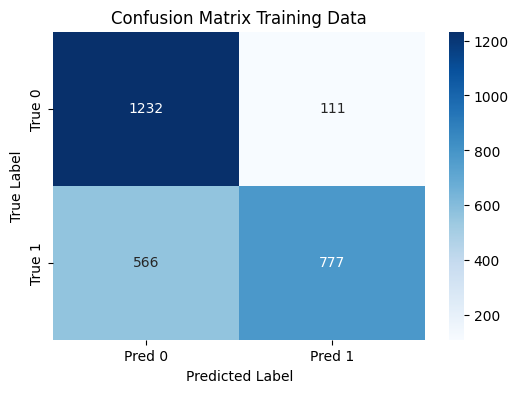

In [81]:
cm_dt2_train=confusion_matrix(y_train1, eval_dt2_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt2_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0' ,'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

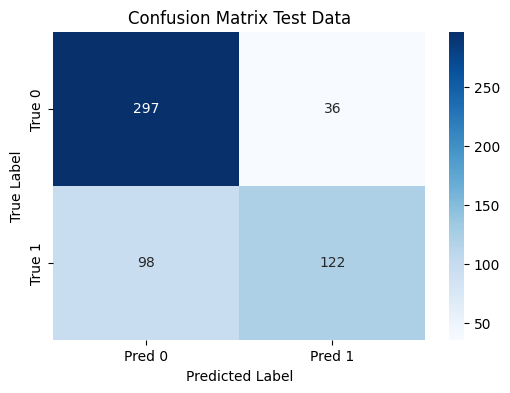

In [82]:
cm_dt2_test=confusion_matrix(y_test1, eval_dt2_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt2_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

### Conclusion
- The best model is Random Forest After Feature selection and after hypertune parameter. Random Forest have good metrics than other model.
- After feature selection, random forest, SVM, and decision tree experienced an increase in metrics. However, logistic regression experienced a decrease in metrics.
- After hypertuning parameters, random forest and SVM experienced an increase in metrics. 